In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## Data Importing

In [2]:
covid = pd.read_csv(r"C:\Users\sunny1\Desktop\Cp2\covid_19\Weekly_United_States_COVID-19_Cases_and_Deaths_among_Dialysis_Patients_-_ARCHIVED.csv")
covid.head()

,state,week_ending,facilities_reporting,staff_census,patient_census,patient_covid_case_rate,staff_covid_case_rate,patient_covid_death_rate,patient_covid_cases,staff_covid_cases,patient_covid_deaths,staff_covid_deaths
0,AK,07/27/2021,9,201.0,703,5.69,4.98,0.0,4,1,0,0
1,AK,01/05/2021,9,NaN,676,1.48,NaN,0.0,1,0,0,0
2,AK,01/12/2021,9,NaN,674,4.45,NaN,0.0,3,0,0,0
3,AK,01/19/2021,9,NaN,672,0.00,NaN,0.0,0,0,0,0
4,AK,01/26/2021,9,NaN,670,0.00,NaN,0.0,0,0,0,0


###  Removing Irrelevant columns

In [3]:
covid = covid.drop(['week_ending'],axis=1)

In [4]:
covid = covid.drop(['staff_census'],axis=1)

In [5]:
covid = covid.drop(['staff_covid_case_rate'],axis=1)

In [6]:
covid = covid.drop(['staff_covid_cases'],axis=1)

In [7]:
covid = covid.drop(['staff_covid_deaths'],axis=1)
covid.columns

Index(['state', 'facilities_reporting', 'patient_census',
       'patient_covid_case_rate', 'patient_covid_death_rate',
       'patient_covid_cases', 'patient_covid_deaths'],
      dtype='object')

In [8]:
covid.head()

,state,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,patient_covid_deaths
0,AK,9,703,5.69,0.0,4,0
1,AK,9,676,1.48,0.0,1,0
2,AK,9,674,4.45,0.0,3,0
3,AK,9,672,0.00,0.0,0,0
4,AK,9,670,0.00,0.0,0,0


In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     6831 non-null   object 
 1   facilities_reporting      6831 non-null   int64  
 2   patient_census            6831 non-null   int64  
 3   patient_covid_case_rate   6831 non-null   float64
 4   patient_covid_death_rate  6831 non-null   float64
 5   patient_covid_cases       6831 non-null   int64  
 6   patient_covid_deaths      6831 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 373.7+ KB


In [10]:
covid.isna().sum()

state                       0
facilities_reporting        0
patient_census              0
patient_covid_case_rate     0
patient_covid_death_rate    0
patient_covid_cases         0
patient_covid_deaths        0
dtype: int64

### Outlier identify & Treatment

<Axes: >

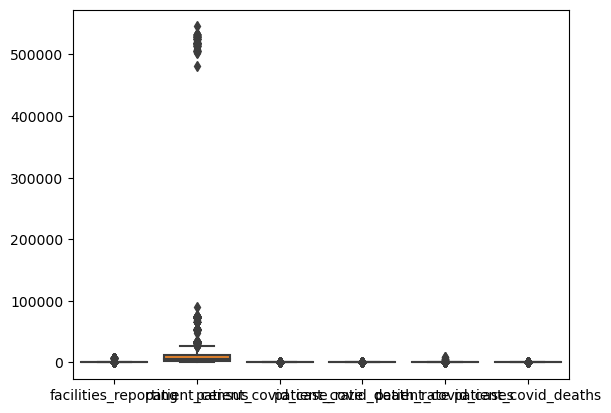

In [11]:
import seaborn as sns
sns.boxplot(data=covid)

In [12]:
for i in covid:                  # i = column name
    if covid[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = covid[i].quantile(0.25)  # for 1 column compute q1
        q3 = covid[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT
        covid[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

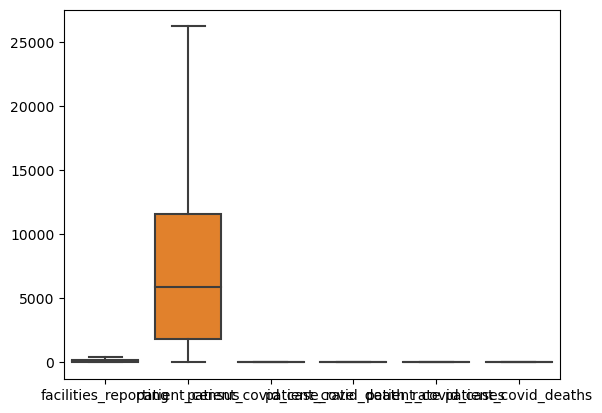

In [13]:
sns.boxplot(data=covid)

In [14]:
covid.describe()

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,patient_covid_deaths
count,6831.000000,6831.000000,6831.000000,6831.000000,6831.000000,6831.000000
mean,129.592080,8395.371249,2.359701,0.113142,17.522691,1.113746
std,124.793655,7890.765331,2.206243,0.169693,20.014437,1.684683
min,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1824.500000,0.660000,0.000000,3.000000,0.000000
50%,80.000000,5860.000000,1.680000,0.000000,8.000000,0.000000
75%,188.000000,11599.500000,3.400000,0.190000,26.000000,2.000000
max,423.500000,26262.000000,7.510000,0.475000,60.500000,5.000000


## correlation matrix

In [15]:
Correlation=covid.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,patient_covid_deaths
facilities_reporting,1.000000,0.980766,-0.010593,0.141664,0.698043,0.542860
patient_census,0.980766,1.000000,-0.009362,0.140525,0.712046,0.543984
patient_covid_case_rate,-0.010593,-0.009362,1.000000,0.397309,0.515393,0.314875
patient_covid_death_rate,0.141664,0.140525,0.397309,1.000000,0.369818,0.758571
patient_covid_cases,0.698043,0.712046,0.515393,0.369818,1.000000,0.654841
patient_covid_deaths,0.542860,0.543984,0.314875,0.758571,0.654841,1.000000


<Axes: >

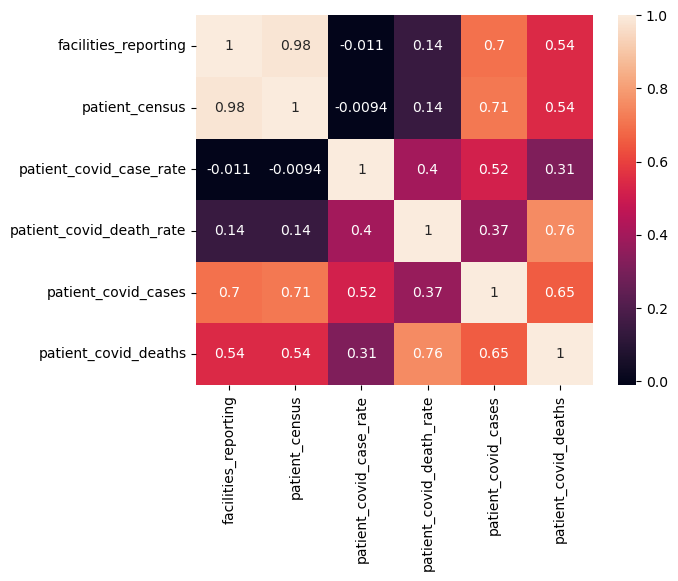

In [16]:
sns.heatmap(covid.corr(),annot = True)

### Data Visualization

In [17]:
covid.patient_covid_deaths.value_counts()

0    3913
1    1169
5     775
2     527
3     278
4     169
Name: patient_covid_deaths, dtype: int64

In [18]:
import plotly.express as px

fig = px.pie(covid,names='patient_covid_deaths',color='patient_covid_deaths',
             color_discrete_map={'3913':'green',
                                 '1169':'red',
                                 '775':'red',
                                 '527':'red',
                                 '278':'red',
                                 '169':'red'
                                })
fig.show()

In [19]:
covid.select_dtypes(include=[np.number]).columns.tolist()

['facilities_reporting',
 'patient_census',
 'patient_covid_case_rate',
 'patient_covid_death_rate',
 'patient_covid_cases',
 'patient_covid_deaths']

## Labeling the data

In [20]:
covid.head()

,state,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,patient_covid_deaths
0,AK,9.0,703,5.69,0.0,4.0,0
1,AK,9.0,676,1.48,0.0,1.0,0
2,AK,9.0,674,4.45,0.0,3.0,0
3,AK,9.0,672,0.00,0.0,0.0,0
4,AK,9.0,670,0.00,0.0,0.0,0


In [21]:
#Employee Numeric columns
covid_num = covid[covid.select_dtypes(include=[np.number]).columns.tolist()]
covid_num.head(3)

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,patient_covid_deaths
0,9.0,703,5.69,0.0,4.0,0
1,9.0,676,1.48,0.0,1.0,0
2,9.0,674,4.45,0.0,3.0,0


In [22]:
#Employee object columns
covid_dummies = covid[covid.select_dtypes(include=['object']).columns.tolist()]
covid_dummies.head(3)

,state
0,AK
1,AK
2,AK


In [23]:
from sklearn.preprocessing import LabelEncoder
covid_dummies = covid_dummies.apply(LabelEncoder().fit_transform)
covid_dummies.head(3)

,state
0,0
1,0
2,0


In [24]:
covid_combined = pd.concat([covid_num, covid_dummies],axis=1)
covid_combined.head()

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,patient_covid_deaths,state
0,9.0,703,5.69,0.0,4.0,0,0
1,9.0,676,1.48,0.0,1.0,0,0
2,9.0,674,4.45,0.0,3.0,0,0
3,9.0,672,0.00,0.0,0.0,0,0
4,9.0,670,0.00,0.0,0.0,0,0


## Data Partition

In [25]:
from sklearn.model_selection import train_test_split
x = covid_combined.drop(['patient_covid_deaths'],axis=1)
y = covid_combined[['patient_covid_deaths']]
# Train test split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [26]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,state,patient_covid_deaths
5274,165.0,10405,0.67,0.100,7.0,44,1
6642,10.0,386,7.51,0.475,8.0,56,1
2468,170.0,10154,0.79,0.000,8.0,20,0
2828,20.0,1265,3.95,0.000,5.0,23,0
3936,19.0,1220,3.28,0.000,4.0,33,0


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestRegressor(n_estimators=25, # make 20 tress
                               criterion='squared_error',
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=30,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=30,
                      min_samples_split=100, n_estimators=25)

In [28]:
X_train.shape

(5464, 6)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestRegressor(n_estimators=25, # make 20 tress
                               criterion='squared_error',
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=30,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_leaf=30,
                      min_samples_split=100, n_estimators=25)

## Predictions on Train Dataset

In [30]:
train['Predicted']=Model.predict(X_train)
train.head()

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,state,patient_covid_deaths,Predicted
5274,165.0,10405,0.67,0.100,7.0,44,1,1.243274
6642,10.0,386,7.51,0.475,8.0,56,1,1.366258
2468,170.0,10154,0.79,0.000,8.0,20,0,0.290325
2828,20.0,1265,3.95,0.000,5.0,23,0,0.051011
3936,19.0,1220,3.28,0.000,4.0,33,0,0.042660


In [31]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,state,patient_covid_deaths
6170,6.0,234,0.00,0.0,0.0,52,0
978,21.0,1605,2.49,0.0,4.0,8,0
816,50.0,4421,0.90,0.0,4.0,7,0
191,177.0,9938,0.10,0.0,1.0,1,0
5563,195.0,11524,2.95,0.0,34.0,46,0


In [32]:
test['Predicted']=Model.predict(X_test)
test.head()

,facilities_reporting,patient_census,patient_covid_case_rate,patient_covid_death_rate,patient_covid_cases,state,patient_covid_deaths,Predicted
6170,6.0,234,0.00,0.0,0.0,52,0,0.036815
978,21.0,1605,2.49,0.0,4.0,8,0,0.054652
816,50.0,4421,0.90,0.0,4.0,7,0,0.111430
191,177.0,9938,0.10,0.0,1.0,1,0,0.213462
5563,195.0,11524,2.95,0.0,34.0,46,0,0.498837


## Comparision

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(train.patient_covid_deaths, train.Predicted)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  87.0


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(test.patient_covid_deaths, test.Predicted)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  87.0


# Loss Function -- RMSE

In [35]:
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(train['patient_covid_deaths'],train['Predicted'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  0.62


In [36]:
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse_1 = mean_squared_error(test['patient_covid_deaths'],test['Predicted'])
# calulcate the root mean squared error
model_rmse = np.sqrt(model_mse_1)

print("RMSE of Test Data : ",np.round(model_rmse,2))

RMSE of Test Data :  0.6


## calculation for mse

In [37]:
model_mse

0.3855529047271369

In [38]:
model_mse_1

0.36120442674608344

In [39]:
ab=0.4026171351426085 + 0.37395636098802976
print("Total MSE : ",ab)

Total MSE :  0.7765734961306383


## Calculation for RMSE

In [40]:
bc=0.63 + 0.61
print("Total RMSE : ",bc)

Total RMSE :  1.24


## Importance Features

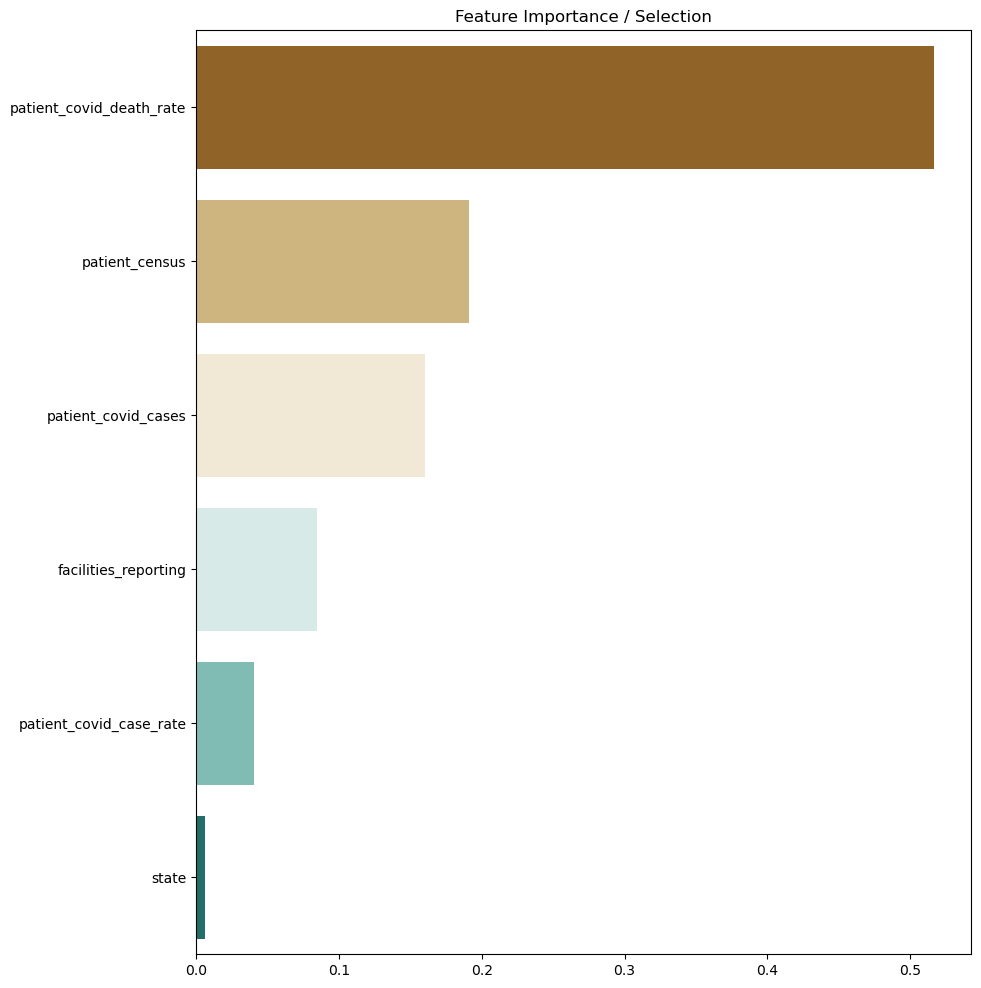

In [41]:
# Plot features importanc## Importance Featureses
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

In [42]:
train=train.loc[:,["patient_covid_death_rate","patient_covid_cases","patient_census","facilities_reporting","patient_covid_deaths"]]
train.head()

,patient_covid_death_rate,patient_covid_cases,patient_census,facilities_reporting,patient_covid_deaths
5274,0.100,7.0,10405,165.0,1
6642,0.475,8.0,386,10.0,1
2468,0.000,8.0,10154,170.0,0
2828,0.000,5.0,1265,20.0,0
3936,0.000,4.0,1220,19.0,0


In [43]:
import pickle

pickle.dump(Model, open('RF_Model.pkl','wb'))   # Exporting model from python to laptop